## K-nearest neighbors(KNN)

K-nearest neighbors (KNN) is a supervised machine learning algorithm used for classification and regression tasks. It is a non-parametric algorithm, meaning it does not make any assumptions about the underlying data distribution.

In KNN, the "k" represents the number of nearest neighbors considered for making predictions. When a new data point is to be classified, the algorithm finds the k nearest neighbors to that point in the feature space. The class or value of the new data point is then determined based on the majority class or the average value of its k nearest neighbors, respectively.

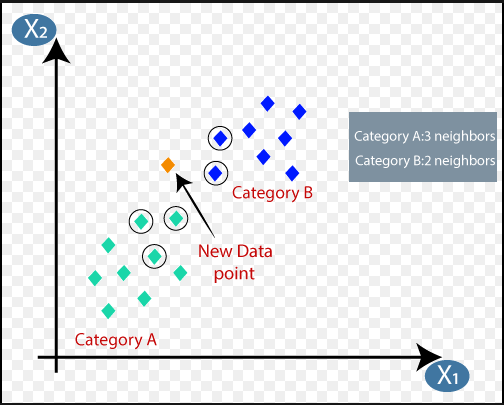

The algorithm works as follows:

1. Choose the number of neighbors, k.
2. Calculate the distance between the new data point and all other data points in the training set using a distance metric such as Euclidean distance.
3. Select the k data points with the shortest distances to the new data point.
4. For classification, determine the majority class among the k neighbors and assign it as the predicted class for the new data point. For regression, calculate the average value of the target variable among the k neighbors and assign it as the predicted value for the new data point.

### Non parametric:
* meaning it does not make any assumptions about the underlying data distribution. 


### Lazy learner:
* It's important to note that KNN does not involve any training process as such. It simply stores the training dataset in memory and uses it to make predictions for new data points. This makes KNN computationally efficient during the prediction phase, but it can be slower during the testing phase since it requires calculating distances for every new data point.

#### The aim of this notebook is to understand the implimentation of knn with hyperparameter tuninig. I have not focused on preprocessing.

## Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'E:\Courses\Data science(ETLHive)\dataset\KNN_Project_Data')

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
df.shape

(1000, 11)

In [5]:
df.isnull().sum()

XVPM            0
GWYH            0
TRAT            0
TLLZ            0
IGGA            0
HYKR            0
EDFS            0
GUUB            0
MGJM            0
JHZC            0
TARGET CLASS    0
dtype: int64

<AxesSubplot:xlabel='TARGET CLASS', ylabel='count'>

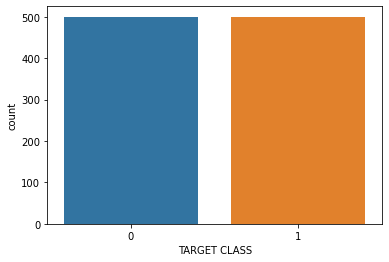

In [8]:
sns.countplot(x=df['TARGET CLASS'])

* Target column is balanced.
* Data is cleaned and preprocessed. 

## Defining X and Y

In [13]:
X=df.drop('TARGET CLASS',axis=1)
Y=df['TARGET CLASS']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=42)

## Feature scaling
As KNN is distance based algorithm, so scaling is an important.

In [18]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

### Model Building

In [44]:
knn=KNeighborsClassifier(n_neighbors=5) #taking default value

In [45]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
y_pred=knn.predict(x_test)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       146
           1       0.80      0.76      0.78       154

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



<AxesSubplot:>

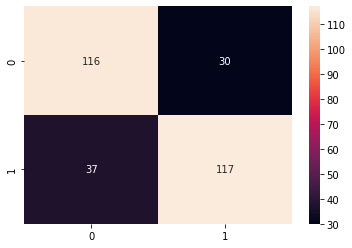

In [48]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

To select the k value we use hyperparameter tuning

## Hyperparameter Tuning

In [49]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5,verbose=1)
knn_cv.fit(x_train,y_train)

print("Best Score:" + str(knn_cv.best_score_)) 
print("Best Parameters: " + str(knn_cv.best_params_))

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best Score:0.832857142857143
Best Parameters: {'n_neighbors': 36}


By tuning the k value we are getting k=36. we will build the model using this value.

In [50]:
knn=KNeighborsClassifier(n_neighbors=36)

knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       146
           1       0.87      0.80      0.83       154

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



<AxesSubplot:>

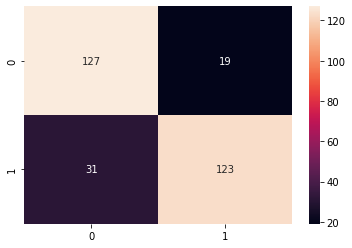

In [51]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

## Conclusion:
* Accuracy of the model is improved By tuning the model using GridSearchcv.